In [ ]:
!pip install pyvis

In [ ]:
!pip install datapane

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import zipfile
import json
import pyvis
from pyvis.network import Network
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately
import datapane as dp

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
#reading the data
data = pd.read_csv("/content/drive/MyDrive/sna_project/DDI_data.csv",encoding="utf-8")
data.head() 

,drug1_id,drug2_id,drug1_name,drug2_name,interaction_type
0,DB00006,DB00346,Bivalirudin,Alfuzosin,serum concentration
1,DB00006,DB13783,Bivalirudin,Acemetacin,risk or severity of bleeding
2,DB00006,DB06605,Bivalirudin,Apixaban,anticoagulant activities
3,DB00006,DB06695,Bivalirudin,Dabigatran etexilate,anticoagulant activities
4,DB00006,DB09075,Bivalirudin,Edoxaban,anticoagulant activities


In [ ]:
row, col = data.shape
print(f'number of rows: {row}')
print(f'number of columns: {col}')
#number of elemnts
print(data.size)

number of rows: 222696
number of columns: 5
1113480


In [ ]:
data.columns

Index(['drug1_id', 'drug2_id', 'drug1_name', 'drug2_name', 'interaction_type'], dtype='object')

Clean the data:

In [ ]:
data1 = data.dropna()

In [ ]:
#a subset of the data
data1.head()

,drug1_id,drug2_id,drug1_name,drug2_name,interaction_type
0,DB00006,DB00346,Bivalirudin,Alfuzosin,serum concentration
1,DB00006,DB13783,Bivalirudin,Acemetacin,risk or severity of bleeding
2,DB00006,DB06605,Bivalirudin,Apixaban,anticoagulant activities
3,DB00006,DB06695,Bivalirudin,Dabigatran etexilate,anticoagulant activities
4,DB00006,DB09075,Bivalirudin,Edoxaban,anticoagulant activities


In [ ]:
#general info about the data.
row, col = data1.shape
print(f'number of rows: {row}')
print(f'number of columns: {col}')
#number of elemnts
print(data1.size)
#so the data is clean of nun values

number of rows: 222696
number of columns: 5
1113480


 Creation of Network Graph

In [ ]:
import networkx as nx
import pandas as pd

# Generate a networkx graph
G = nx.from_pandas_edgelist(data1, 'drug1_name', 'drug2_name')

# Give the graph a name
G.name = 'Drug Interactions Network'

# Obtain general information of graph
print(nx.info(G))

# Get graph density
density = nx.density(G)
print("Network density:", density)

Graph named 'Drug Interactions Network' with 1868 nodes and 222271 edges
Network density: 0.12746519339044304


Degree Centrality

In [ ]:
from operator import itemgetter

# Create dictionary to store degrees of nodes
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

# Generate sorted list of tuples of drug entity and corresponding degree
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 drugs by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 drugs by degree:
('Amiodarone', 1028)
('Nefazodone', 986)
('Phenobarbital', 976)
('Venlafaxine', 969)
('Primidone', 947)
('Phenytoin', 935)
('Fluvoxamine', 933)
('Curcumin', 924)
('Ziprasidone', 920)
('Carbamazepine', 917)
('Fosphenytoin', 916)
('Pentobarbital', 899)
('Verapamil', 878)
('Clozapine', 855)
('Diltiazem', 849)
('Vemurafenib', 842)
('Cyclosporine', 841)
('Pitolisant', 815)
('Stiripentol', 813)
('Rifampicin', 811)


Visualization with Pyvis and DataPane

In [ ]:
# Set weights as default value of 1 (since we do not have data on interaction severity at this stage)
data1['weight'] = 1

# Keep only drug name columns
data1 = data1[['drug1_name', 'drug2_name', 'weight']]
data1.head()

,drug1_name,drug2_name,weight
0,Bivalirudin,Alfuzosin,1
1,Bivalirudin,Acemetacin,1
2,Bivalirudin,Apixaban,1
3,Bivalirudin,Dabigatran etexilate,1
4,Bivalirudin,Edoxaban,1


In [ ]:
# Generate a networkx graph
G = nx.from_pandas_edgelist(data1, 'drug1_name', 'drug2_name')

# Give the graph a name
G.name = 'Drug Interactions Network'

# Check whether graph is directed or undirected (False = undirected)
print(G.is_directed())

# Obtain general information of graph
print(nx.info(G))

# Get graph density
density = nx.density(G)
print("Network density:", density)

False
Graph named 'Drug Interactions Network' with 1868 nodes and 222271 edges
Network density: 0.12746519339044304


In [ ]:
# Get most connected node (i.e. drug with most drug interactions)
G.degree()
max(dict(G.degree()).items(), key = lambda x : x[1])

('Amiodarone', 1028)

In [ ]:
# Create dictionary to store degrees of nodes
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

# Generate sorted list of tuples of drug entity and corresponding degree
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 drugs by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 drugs by degree:
('Amiodarone', 1028)
('Nefazodone', 986)
('Phenobarbital', 976)
('Venlafaxine', 969)
('Primidone', 947)
('Phenytoin', 935)
('Fluvoxamine', 933)
('Curcumin', 924)
('Ziprasidone', 920)
('Carbamazepine', 917)
('Fosphenytoin', 916)
('Pentobarbital', 899)
('Verapamil', 878)
('Clozapine', 855)
('Diltiazem', 849)
('Vemurafenib', 842)
('Cyclosporine', 841)
('Pitolisant', 815)
('Stiripentol', 813)
('Rifampicin', 811)


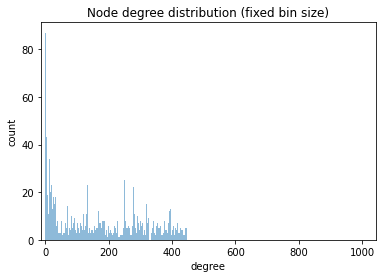

In [ ]:
# Get all degree values
sorted_degree_values = [pair[1] for pair in sorted_degree]

# Set fixed bin size
bins = np.arange(0, 450, 2) # fixed bin size

# Plot histogram
plt.xlim([min(sorted_degree_values)-15, max(sorted_degree_values)+15])
plt.hist(sorted_degree_values, bins=bins, alpha=0.5)
plt.title('Node degree distribution (fixed bin size)')
plt.xlabel('degree')
plt.ylabel('count')
plt.show()

In [ ]:
# Get degree centrality (corresponds with degree)
degree_centrality = nx.degree_centrality(G)
degree_centrality = dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))
degree_centrality

{'Amiodarone': 0.550615961435458,
 'Nefazodone': 0.5281199785752544,
 'Phenobarbital': 0.5227637921799678,
 'Venlafaxine': 0.5190144617032673,
 'Primidone': 0.5072308516336368,
 'Phenytoin': 0.500803427959293,
 'Fluvoxamine': 0.49973219068023567,
 'Curcumin': 0.49491162292447777,
 'Ziprasidone': 0.49276914836636315,
 'Carbamazepine': 0.49116229244777715,
 'Fosphenytoin': 0.49062667380824854,
 'Pentobarbital': 0.48152115693626135,
 'Verapamil': 0.4702731655061596,
 'Clozapine': 0.4579539367970005,
 'Diltiazem': 0.4547402249598286,
 'Vemurafenib': 0.450990894483128,
 'Cyclosporine': 0.45045527584359935,
 'Pitolisant': 0.4365291912158543,
 'Stiripentol': 0.435457953936797,
 'Rifampicin': 0.4343867166577397,
 'Dihydroergotamine': 0.43385109801821103,
 'Isradipine': 0.43331547937868237,
 'Thioridazine': 0.43224424209962503,
 'Ketoconazole': 0.4301017675415104,
 'Desipramine': 0.4279592929833958,
 'Citalopram': 0.42742367434386713,
 'Nicardipine': 0.4258168184252812,
 'Fluoxetine': 0.4247455

In [ ]:
# Betweenness centrality not relevant for drug-drug interactions dataset, so not running this chunk of code
# betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
# eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# # Assign each to an attribute in your network
# nx.set_node_attributes(G, betweenness_dict, 'betweenness')
# nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

# sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

# print("Top 20 nodes by betweenness centrality:")
# for b in sorted_betweenness[:20]:
#     print(b)

Network Visualization (with Pyvis)

In [ ]:
# Define function to generate Pyvis visualization
def generate_network_viz(df, source_col, target_col, weights, 
                         layout='barnes_hut',
                         central_gravity=0.15,
                         node_distance=420,
                         spring_length=100,
                         spring_strength=0.15,
                         damping=0.96
                         ):
    
    # Generate a networkx graph
    G = nx.from_pandas_edgelist(data1, source_col, target_col, weights)
    
    if layout == 'repulsion':
        bgcolor, font_color = '#222222', 'white'
    else:
        bgcolor, font_color = 'white', 'black'
    
    # Initiate PyVis network object
    drug_net = Network(
                       height='700px', 
                       width='100%',
                       bgcolor=bgcolor, 
                       font_color=font_color, 
                       notebook=True
                      )
    
    # Take Networkx graph and translate it to a PyVis graph format
    drug_net.from_nx(G)
    
    # Create different network layout (repulsion or Barnes Hut)
    if layout == 'repulsion':
        drug_net.repulsion(
                            node_distance=node_distance, 
                            central_gravity=central_gravity, 
                            spring_length=spring_length, 
                            spring_strength=spring_strength, 
                            damping=damping
                           )
        
    # Run default Barnes Hut visualization
    else:
          drug_net.barnes_hut(
                              gravity=-80000, 
                              central_gravity=central_gravity, 
                              spring_length=spring_length, 
                              spring_strength=spring_strength, 
                              damping=damping, 
                              overlap=0
                            )      
          
          #Set additional options 
          # Create neighbour map (Optional for now)
          sources = data1[source_col]
          targets = data1[target_col]
          weights = data1[weights]

          edge_data = zip(sources, targets, weights)
          for e in edge_data:
              src = e[0]
              dst = e[1]
              w = e[2]

              df.add_node(src, src, title=src)
              df.add_node(dst, dst, title=dst)
              df.add_edge(src, dst, value=w)

            #Add neighbor data to node hover data
          neighbor_map = data1.get_adj_list()

          for node in db_net.nodes:
              node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
              node['value'] = len(neighbor_map[node['id']])

    return drug_net

In [ ]:
# Load entire network for all drug interactions (Will take very long to load, run this code with caution)
 #db_net_all = generate_network_viz(data1, 'drug1_name', 'drug2_name', 'weight')
 #db_net_all.show('drug_interactions_db.html')

Subset data

Earlier network is too vast and complex for viewing

Narrow down dataset to subset of drugs for network visualization

In [ ]:
# Define list of oral medications for the common diseases
dm_meds = ['Metformin', 'Linagliptin', 'Sitagliptin', 'Glibenclamide', 'Gliclazide',
          'Glimepiride', 'Glipizide', 'Tolbutamide', 'Canagliflozin', 'Dapagliflozin',
          'Empagliflozin', 'Dapagliflozin', 'Acarbose', 'Liraglutide']

cardio_meds = ['Captopril', 'Enalapril', 'Lisinopril', 'Perindopril', 'Irbesartan',
               'Losartan', 'Telmisartan', 'Valsartan', 'Candesartan', 'Atenolol', 
               'Bisoprolol', 'Carvedilol', 'Propranolol', 'Amlodipine', 'Diltiazem', 
               'Nifedipine', 'Verapamil', 'Bumetanide', 'Frusemide', 'Isosorbide',
               'Hydrochlorothiazide', 'Spironolactone', 'Isosorbide Dinitrate', 
               'Isosorbide Mononitrate', 'Aspirin', 'Clopidogrel', 'Ticagrelor', 
               'Atorvastatin', 'Rosuvastatin', 'Simvastatin', 'Pravastatin']  

# List of meds with the most interactions
subset_meds_1 = ['Phenytoin', 'Mifepristone', 'Paroxetine']

# Sample drugs for diabetes (Metformin), hyperlipidemia (Simvastatin), and hypertension (Lisinopril)
subset_meds_2 = ['Metformin', 'Simvastatin', 'Lisinopril']

In [ ]:
# Focus on subset meds
df_db_int_sm = data1.loc[data1['drug1_name'].isin(subset_meds_2) | data1['drug2_name'].isin(subset_meds_2)]
df_db_int_sm = df_db_int_sm.reset_index(drop=True)
df_db_int_sm.head()

,drug1_name,drug2_name,weight
0,Bivalirudin,Simvastatin,1
1,Goserelin,Metformin,1
2,Daptomycin,Simvastatin,1
3,Cyclosporine,Simvastatin,1
4,Cyclosporine,Lisinopril,1


In [ ]:
df_db_int_sm.shape

(998, 3)

In [ ]:
df_db_int_sm.to_csv("/content/drive/MyDrive/sna_project/df_db_int_sm.csv")